🔍 Explained Variance Ratio by PCA component:
Component 1: 29.09%
Component 2: 12.22%
Component 3: 10.25%
Component 4: 7.58%
Component 5: 6.70%
Component 6: 5.57%
Component 7: 4.85%
Component 8: 4.64%
Component 9: 3.65%
Component 10: 3.34%

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.84      0.83      2170
           1       0.84      0.80      0.82      2150

    accuracy                           0.82      4320
   macro avg       0.82      0.82      0.82      4320
weighted avg       0.82      0.82      0.82      4320


📉 Confusion Matrix:


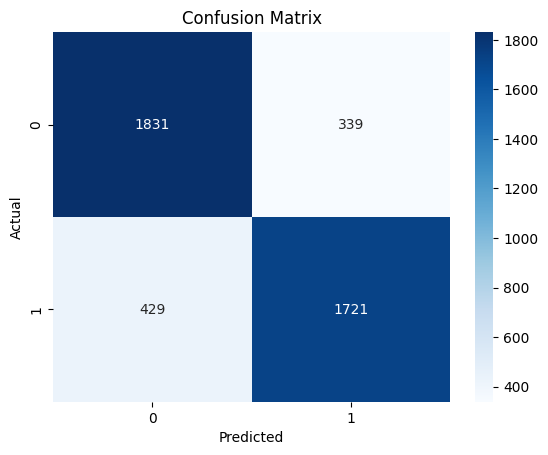

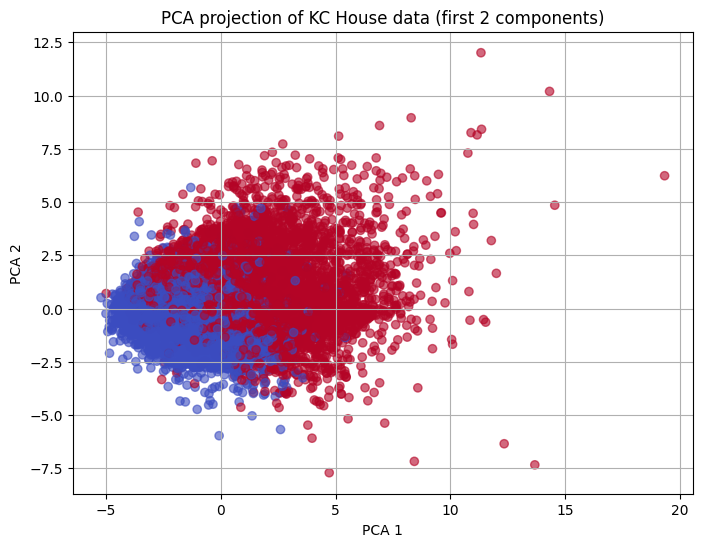

In [1]:
# 📦 Install required package
!pip install -q scikit-learn

# 📊 Logistic Regression with PCA on KC House Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# 📥 Load data
df = pd.read_csv("/content/kc_house_data.csv")

# 🧼 Clean data
df = df.drop_duplicates()
df = df[(df['bedrooms'] > 0) & (df['bathrooms'] > 0)]
df = df.drop(columns=['id', 'date'])

# 🏷️ Create binary target: expensive or not
threshold = df['price'].median()
df['expensive'] = (df['price'] > threshold).astype(int)

# 🎯 Features & new target
X = df.drop(columns=['price', 'expensive'])
y = df['expensive']
X = pd.get_dummies(X, drop_first=True)

# 📏 Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 🧬 PCA with 10 components
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)

# 🔎 Explained variance
explained_var = pca.explained_variance_ratio_
print("🔍 Explained Variance Ratio by PCA component:")
for i, ev in enumerate(explained_var):
    print(f"Component {i+1}: {ev:.2%}")

# 🧪 Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# 🤖 Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 📊 Evaluation
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))

print("\n📉 Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# 📈 PCA Visualization of first 2 components
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', alpha=0.6)
plt.title("PCA projection of KC House data (first 2 components)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()
